# Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Generating Data Points ourselves

In [57]:
np.random.seed(42)
n_groups = 2
group_size = 20

data = {
    "group": np.repeat([f"Group {i + 1}" for i in range(n_groups)], group_size),
    "x": np.random.uniform(0, 10, n_groups * group_size),
    "z": np.random.normal(0, 1, n_groups * group_size),
}

# Creating Dependent Variable $(y)$ using $Fixed Effects$ and $Random Effects$

### Look there are added random effects for Intercepts here

In [62]:
data["y"] = (
    2.0  # Intercept
    + 0.5 * data["x"]  # Fixed effect of x
    + np.random.normal(0, 1, n_groups * group_size)  # Residual error
    + np.random.normal(0, 2, n_groups).repeat(group_size)  # Random intercept per group
)

# Create a DataFrame
df = pd.DataFrame(data)
df

,group,x,z,y
0,Group 1,3.745401,-0.013497,7.569538
1,Group 1,9.507143,-1.057711,9.316443
2,Group 1,7.319939,0.822545,10.534342
3,Group 1,5.986585,-1.220844,9.476774
4,Group 1,1.560186,0.208864,7.302674
5,Group 1,1.559945,-1.959670,5.602134
6,Group 1,0.580836,-1.328186,7.424761
7,Group 1,8.661761,0.196861,8.660579
8,Group 1,6.011150,0.738467,9.323981
9,Group 1,7.080726,0.171368,11.462368


# Plotting $Box Plot$ to better visualize data by Groups

/tmp/ipykernel_5548/4264149335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y="y", data=df, palette="tab10")


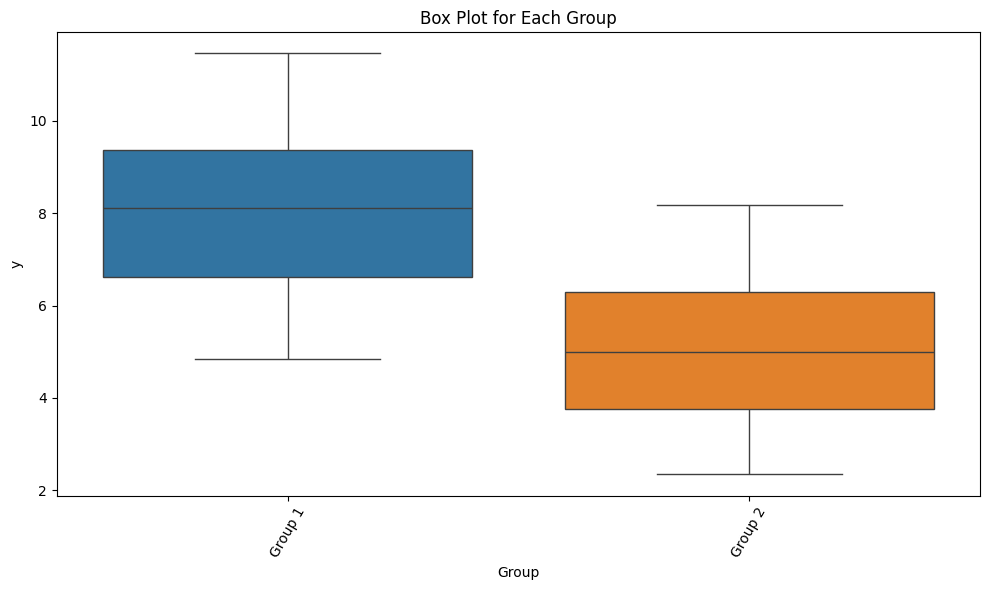

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="group", y="y", data=df, palette="tab10")
plt.title("Box Plot for Each Group")
plt.xlabel("Group")
plt.xticks(rotation=60)
plt.ylabel("y")
plt.tight_layout()
plt.show()

# Fitting a linear mixed model

In [68]:
model = MixedLM(df["y"], sm.add_constant(df["x"]), groups=df["group"])
result = model.fit()

# Model summary
print(result.summary())


        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y       
No. Observations: 40      Method:             REML    
No. Groups:       2       Scale:              0.9355  
Min. group size:  20      Log-Likelihood:     -59.6615
Max. group size:  20      Converged:          Yes     
Mean group size:  20.0                                
------------------------------------------------------
             Coef. Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
const        4.137    1.469  2.816 0.005  1.258  7.017
x            0.531    0.052 10.138 0.000  0.428  0.634
Group Var    4.157    6.228                           



# Visualization of model predictions

/tmp/ipykernel_5548/3072083933.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  random_effect = result.random_effects[group][0]  # Access the random intercept


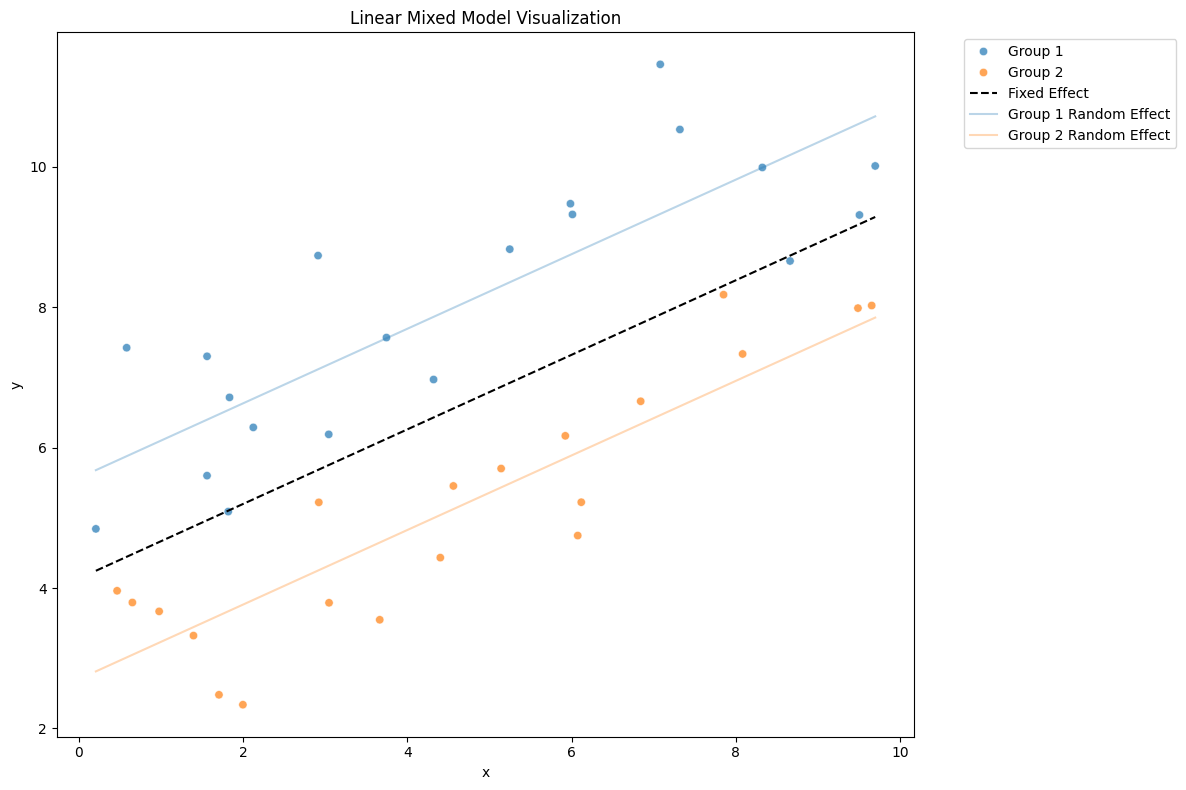

In [69]:

plt.figure(figsize=(12, 8))

# Plot the data with group-specific random effects
sns.scatterplot(x="x", y="y", hue="group", data=df, palette="tab10", alpha=0.7)

# Add fixed-effect regression line
x_vals = np.linspace(df["x"].min(), df["x"].max(), 100)
y_vals = result.params["const"] + result.params["x"] * x_vals
plt.plot(x_vals, y_vals, color="black", linestyle="--", label="Fixed Effect")

# Add random effects
for group in df["group"].unique():
    random_effect = result.random_effects[group][0]  # Access the random intercept
    y_vals_group = result.params["const"] + result.params["x"] * x_vals + random_effect
    plt.plot(x_vals, y_vals_group, alpha=0.3, label=f"{group} Random Effect")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Linear Mixed Model Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()


# Now visualizing after adding $Random Effect Slope$ in the data

In [41]:
np.random.seed(42)
n_groups = 2
group_size = 20
# Generate data with random intercepts and slopes
data = {
    "group": np.repeat([f"Group {i + 1}" for i in range(n_groups)], group_size),
    "x": np.random.uniform(0, 10, n_groups * group_size),
    "z": np.random.normal(0, 1, n_groups * group_size),
}

# Generate random intercepts and slopes for each group
random_intercepts = np.random.normal(0, 2, n_groups)  # Random intercepts with SD=2
random_slopes = np.random.normal(0, 0.5, n_groups)    # Random slopes with SD=0.5

data["y"] = (
    2.0  # Fixed intercept
    + 0.5 * data["x"]  # Fixed slope
    + np.repeat(random_intercepts, group_size)  # Random intercepts
    + np.repeat(random_slopes, group_size) * data["x"]  # Random slopes
    + np.random.normal(0, 1, n_groups * group_size)  # Residual error
)

df = pd.DataFrame(data)
df.sample(10)

,group,x,z,y
18,Group 1,4.319450,0.324084,-1.961964
26,Group 2,1.996738,0.331263,6.605504
27,Group 2,5.142344,0.975545,9.011435
28,Group 2,5.924146,-0.479174,10.364610
20,Group 2,6.118529,-0.676922,10.999089
7,Group 1,8.661761,0.196861,-5.604845
6,Group 1,0.580836,-1.328186,2.935839
12,Group 1,8.324426,-1.478522,-5.343137
13,Group 1,2.123391,-0.719844,0.721939
14,Group 1,1.818250,-0.460639,0.552875


In [42]:
# Fit linear mixed model with random intercept and slope
exog = sm.add_constant(df[["x"]])  # Fixed effects design matrix
exog_re = exog.copy()              # Random effects design matrix (includes intercept and x)

model = MixedLM(df["y"], exog, groups=df["group"], exog_re=exog_re)
result = model.fit()

# Print model summary
print(result.summary())

         Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: y       
No. Observations:   40      Method:             REML    
No. Groups:         2       Scale:              0.6467  
Min. group size:    20      Log-Likelihood:     -54.7543
Max. group size:    20      Converged:          Yes     
Mean group size:    20.0                                
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
const          4.026    2.839  1.418 0.156 -1.539  9.590
x             -0.071    1.364 -0.052 0.958 -2.745  2.602
const Var     16.012                                    
const x x Cov  7.714                                    
x Var          3.716                                    



/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/aayush/anaconda3/envs/pytorch/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


/tmp/ipykernel_203490/735406231.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  random_intercept = re[0]
/tmp/ipykernel_203490/735406231.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  random_slope = re[1]


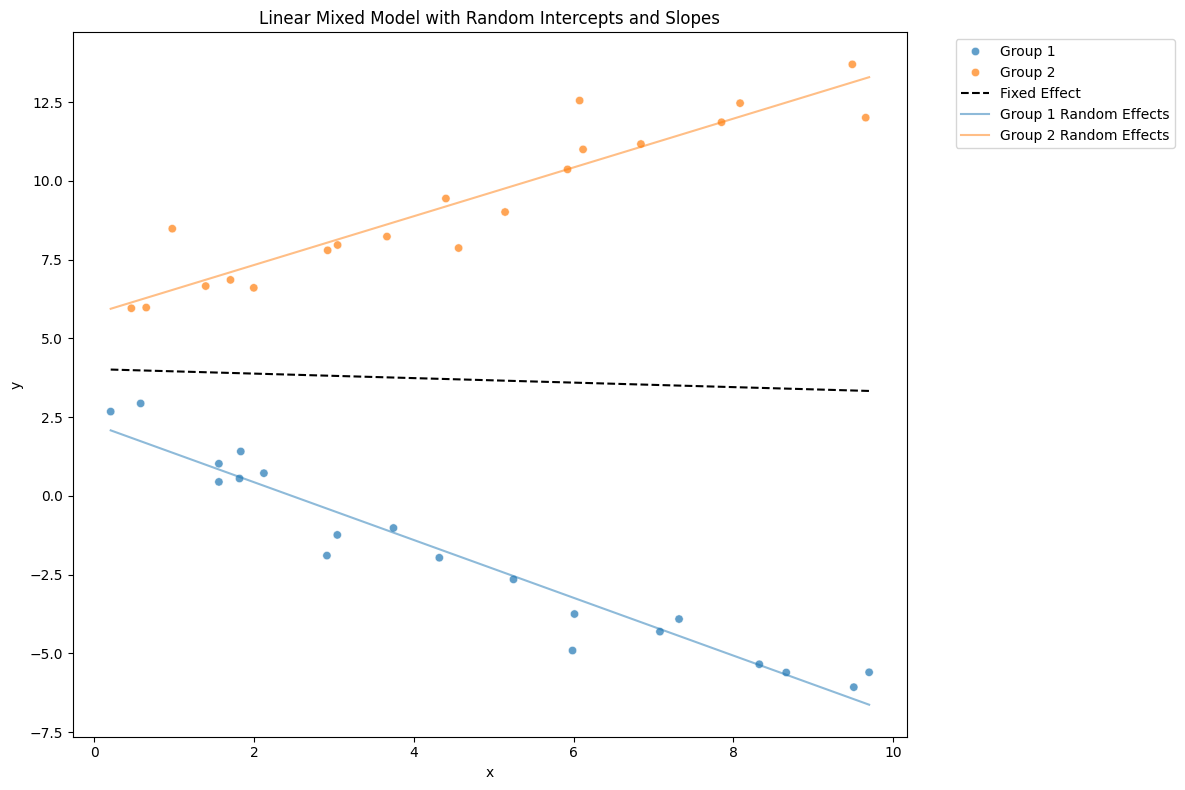

In [43]:
# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x", y="y", hue="group", data=df, palette="tab10", alpha=0.7)

# Fixed effects line
x_vals = np.linspace(df["x"].min(), df["x"].max(), 100)
y_vals_fixed = result.params["const"] + result.params["x"] * x_vals
plt.plot(x_vals, y_vals_fixed, color="black", linestyle="--", label="Fixed Effect")

# Add group-specific random effects lines
for group in df["group"].unique():
    # Get random effects (intercept and slope)
    re = result.random_effects[group]
    random_intercept = re[0]
    random_slope = re[1]
    
    # Calculate group-specific line
    y_vals_group = (result.params["const"] + random_intercept) + (result.params["x"] + random_slope) * x_vals
    plt.plot(x_vals, y_vals_group, alpha=0.5, label=f"{group} Random Effects")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Linear Mixed Model with Random Intercepts and Slopes")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()